
image 1/1 /content/a7sp8ji_high-security-number-plates_625x300_12_October_18.webp: 416x640 1 license_plate, 223.5ms
Speed: 3.8ms preprocess, 223.5ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 640)
Detected Number Plate: NND DL 7c0 1939 


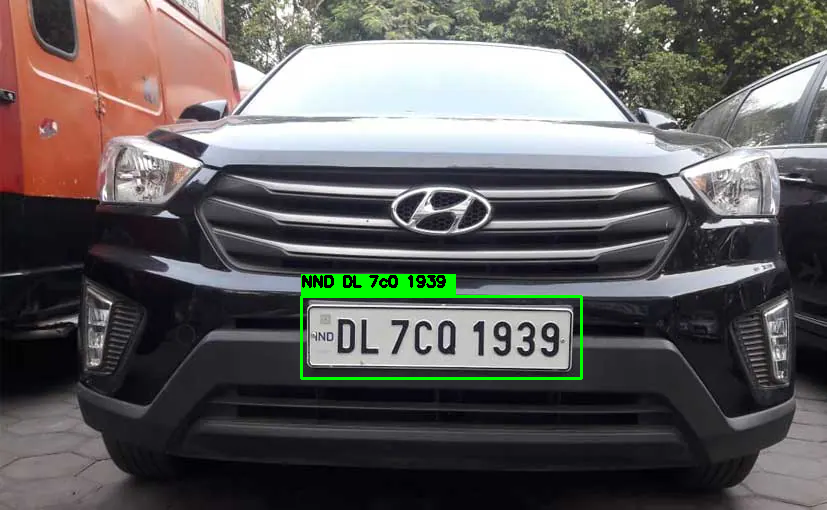


image 1/1 /content/images.jpg: 640x480 1 license_plate, 263.0ms
Speed: 3.6ms preprocess, 263.0ms inference, 3.1ms postprocess per image at shape (1, 3, 640, 480)
Detected Number Plate: RJ228 9769 


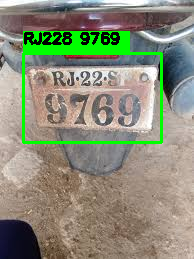


image 1/1 /content/why-are-number-plates-yellow-and-white.jpg: 416x640 1 license_plate, 234.7ms
Speed: 7.2ms preprocess, 234.7ms inference, 1.2ms postprocess per image at shape (1, 3, 416, 640)
Detected Number Plate: SN66 XMZ 


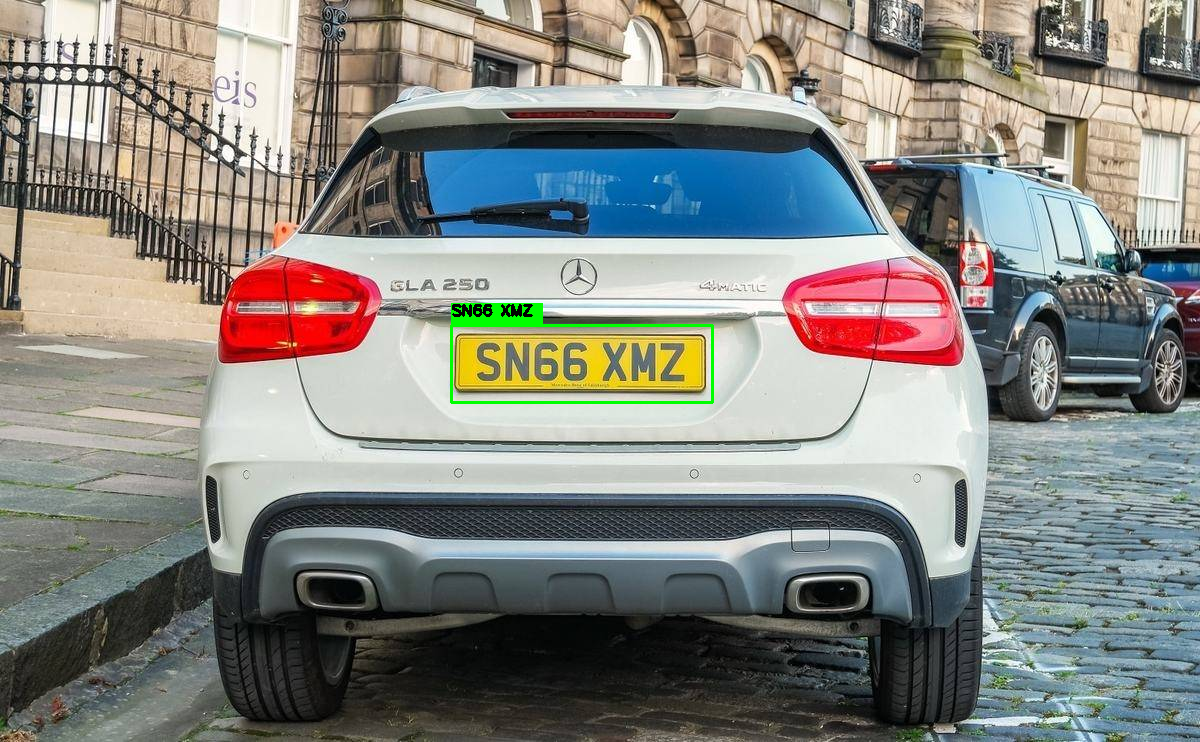


image 1/1 /content/download (1).jpg: 480x640 1 license_plate, 290.8ms
Speed: 3.7ms preprocess, 290.8ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)
Detected Number Plate: KA G2HP 9657 


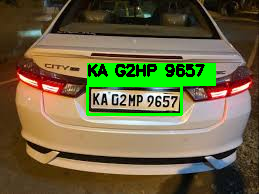

In [20]:
# !pip install ultralytics
# !pip install easyocr

from ultralytics import YOLO
import easyocr
import cv2
from google.colab.patches import cv2_imshow

model = YOLO('/content/number_plate_detector.pt')
reader = easyocr.Reader(['en'])

def process_image(image_path):
    results = model(image_path)
    img = cv2.imread(image_path)
    number = ""

    for result in results:
        boxes = result.boxes.xyxy.cpu().numpy()
        for box in boxes:
            x1, y1, x2, y2 = box.astype(int)

            number_plate_image = img[y1:y2, x1:x2]
            gray_number_plate_image = cv2.cvtColor(number_plate_image, cv2.COLOR_BGR2GRAY)


            ocr_results = reader.readtext(gray_number_plate_image)

            for (bbox, text, prob) in ocr_results:
                number = number + text + " "

    print(f"Detected Number Plate: {number}")

    cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)

    (text_width, text_height), baseline = cv2.getTextSize(number, cv2.FONT_HERSHEY_SIMPLEX, 0.5, 2)

    cv2.rectangle(img, (x1, y1 - text_height - 10), (x1 + text_width, y1), (0, 255, 0), -1)

    cv2.putText(img, number, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 2)


    cv2_imshow(img)

image_paths = ['/content/a7sp8ji_high-security-number-plates_625x300_12_October_18.webp',
               '/content/images.jpg',
               '/content/why-are-number-plates-yellow-and-white.jpg',
               '/content/download (1).jpg']

for image_path in image_paths:
    process_image(image_path)
